<a href="https://colab.research.google.com/github/MauricioTellezNava/Keman_nimikis-/blob/main/chinese_investments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción: ¿Por qué estudiar a China?

# OFDI vs Infraestructura

Ante el ambiguo concepto de "inversion extranjera", el Dr. Enrique Dussel Peters propone diferenciar dos tipos de flujos de capital: los proyectos de infraestructura y las salidas de inversión extranjera directa 


* Define a los proyectos de **infraestructura** como: "un servicio entre un cliente y un proveedor mediante un contrato -usualmente resultado de un proceso de licitación, aunque el proceso puede ser por designación directa- en el cual la propiedad es del cliente” (Dussel Peters 2020:2).

* Por otro lado, usa el término **OFDI** para designar a las salidas de inversión extranjera directa.

Basándonos en los datos registrados por el Monitor de OFDI y el Monitor de proyectos de infraestructura del la RED ALC-China, buscaremos responder una serie de preguntas relevantes para comprender el impacto que han tenido hasta ahora las inversiones de China en la región de América Latina y el Caribe. 

Esperando que estos cuestionamientos contribuyan a redimensionar el panorama económico de la región, y que conduzcan a nuevas reflexiones en torno al papel que los agentes económicos deberíamos adoptar en sinergia con los gobiernos y las empresas del continente, con miras a aprovechar estos flujos de capital para favorecer el desarrollo local y regional.

# Referencias

* Dussel Peters Enrique, "Monitor de la OFDI china en América Latina y el Caribe 2021", [en línea], México, *RED ALC-CHINA*, 2021, Dirección URL: https://www.redalc-china.org/monitor/index.php?option=com_content&view=article&id=437, [consulta: 10 de octubre de 2022].

* Dussel Peters Enrique, "Monitor de la INFRAESTRUCTURA china en América latina y el Caribe 2021", [en línea], México, *RED ALC-CHINA*, 2021, Dirección URL: https://www.redalc-china.org/monitor/index.php?option=com_content&view=article&id=437, [consulta: 10 de octubre de 2022].


# Paqueterías


In [165]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **OFDI**

# Preguntas

* 0) Países con mayor inversión en OFDI de 2000 a 2021
* 1) ¿Cómo se ve el monto anual de inversiones de ofdi en ALyC?
* 2) ¿Cómo se ve el empleo anual generado por las inversiones de ofdi en ALyC?
* 3) ¿Cuáles son las diez empresas inversoras principales?
* 4) ¿Qué sectores concentran las inversiones de ofdi en ALyC?
* 5) ¿Cómo se ven las inversiones anuales de ofdi en México?
* 6) ¿Cómo se ven los empleos anuales generados por las inversiones de ofdi en México?
* 7) En México, ¿qué sectores económicos son los más relevantes para China?
* 8) Empresas con mayor cantidad de empleos generados por inversiones en OFDI

In [167]:
ofdi = pd.read_excel("/content/drive/MyDrive/DEV F/Proyecto/CECHIMEX/DusselPeters_Monitor_OFDI_Database_2022.xlsx")

In [168]:
ofdi.head()

,Year,Date,Investing Company,"Headquarter of Chinese Company: Province, Municipality, Autonomous Region in China",Headquarter of Chinese Company: City,Target company,Country in LAC,Destination sector,Project Type,Destination city in LAC,Employment (number of workers),Investment (millions of dollars),"Raw materials = 0,, Manufacturing = 1, Services and domestic market = 2, Buying technology = 3","Public property = 1, private = 0"
0,2000,2000/01,Huawei Technologies,Guangdong,Shenzhen,Huawei Technologies,Mexico,Communications,New,Mexico City,63,20.0,1,0
1,2000,2000/09,Huawei Technologies,Guangdong,Shenzhen,Huawei Technologies,Colombia,Communications,New,Bogotá,1,240.0,2,0
2,2001,2001/12,Hutchison Port Holding (HPH),Hong Kong,Hong Kong,Internacional de Contenedores Asociados de Ver...,Mexico,Ports,M&A,Veracruz,5500,450.0,2,0
3,2003,2003/04,Shandong Gold Group,Shandong,Jinan,Shandong Gold,Venezuela,Minerals,New,El Callao,350,13.0,0,1
4,2003,2003/06,Changquing Petroleum Exploration Bureau (CPEB),Shaanxi,Xian,Changquing Petroleum Exploration Bureau (CPEB),Ecuador,Minerals,New,Atacapí,27,70.0,0,1


In [169]:
ofdi.columns

Index(['Year', 'Date', 'Investing Company',
       'Headquarter of Chinese Company: Province, Municipality, Autonomous Region in China',
       'Headquarter of Chinese Company: City', 'Target company',
       'Country in LAC', 'Destination sector', 'Project Type',
       'Destination city  in LAC', 'Employment (number of workers)',
       'Investment (millions of dollars)',
       'Raw materials = 0,, Manufacturing = 1, Services and domestic market = 2, Buying technology = 3',
       'Public property = 1, private = 0'],
      dtype='object')

Numero de empresas inversoras

In [170]:
len(set(ofdi['Investing Company']))

319

Países con más inversiones

In [171]:
ofdi.groupby("Country in LAC").size().sort_values(ascending=False)

Country in LAC
Brazil                  146
Mexico                  108
Chile                    52
Argentina                41
Peru                     38
Colombia                 26
Venezuela                16
Guyana                   13
Ecuador                  13
Bolivia                  11
Jamaica                   8
Uruguay                   7
Panama                    7
Trinidad y Tobago         5
Costa Rica                4
Cuba                      3
Barbados                  3
Honduras                  2
Republica Dominicana      2
República Dominicana      1
Suriname                  1
Antigua y Barbuda         1
Nicaragua                 1
El Salvador               1
Belice                    1
Haiti                     1
dtype: int64

# 0) Países con mayor inversión en OFDI de 2000 a 2021

In [172]:
grouped_countries  = ofdi.groupby("Country in LAC")

In [173]:
higher_investments = pd.DataFrame(grouped_countries.sum()["Investment (millions of dollars)"].sort_values(ascending=False))

In [174]:
higher_investments["Country"] = np.array(higher_investments.index)

In [175]:
# higher_investments = higher_investments.drop(columns = ["Countriy", "Countries"])

In [176]:
higher_investments.head(5)

,Investment (millions of dollars),Country
Country in LAC,,
Brazil,60955.669346,Brazil
Peru,29846.100000,Peru
Chile,20465.480000,Chile
Mexico,16920.770000,Mexico
Argentina,14864.550000,Argentina


In [177]:
fig = px.bar(higher_investments, x='Country', y='Investment (millions of dollars)', title='Países de ALyC con mayor inversión en OFDI de 2000 a 2021')
fig.show()

Grafica treemap con plotly

In [178]:
# una mejor alternativa al pie chart es el treemap
# https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#33.-Treemap

!pip install squarify
import squarify 
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


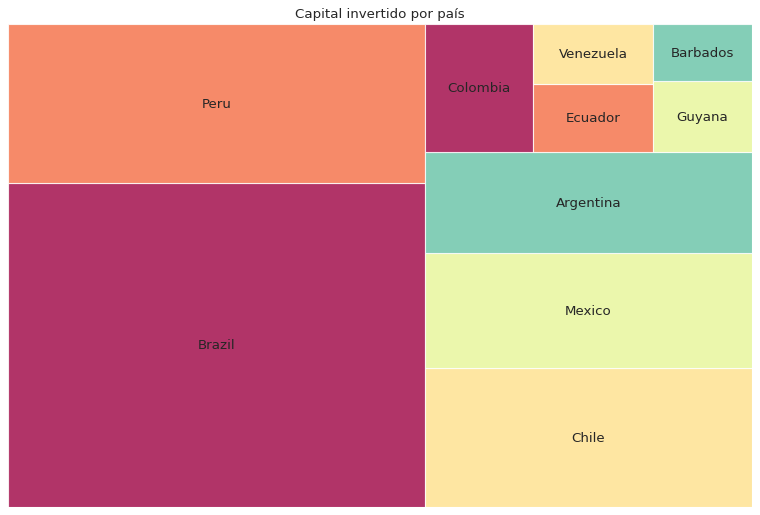

In [179]:
df = higher_investments.head(10)
sizes = df['Investment (millions of dollars)'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
labels = df["Country"]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Capital invertido por país')
plt.axis('off')
plt.show()


# 1) ¿Cómo se ve el monto anual de inversiones de ofdi en ALyC?

In [180]:
by_years = ofdi.groupby("Year")

In [181]:
invest_by_years = pd.DataFrame(by_years.sum()["Investment (millions of dollars)"].sort_values(ascending=False))

In [182]:
invest_by_years = invest_by_years.sort_index()

In [183]:
invest_by_years["Year"] = np.array(invest_by_years.index)

In [184]:
invest_by_years

,Investment (millions of dollars),Year
Year,,
2000,260.000000,2000
2001,450.000000,2001
2003,282.400000,2003
2004,3646.200000,2004
2005,103.000000,2005
2006,4790.800000,2006
2007,2161.570000,2007
2008,5020.120000,2008
2009,5047.000000,2009


In [185]:
fig = px.line(invest_by_years, x="Year", y="Investment (millions of dollars)", title='Annual investments in OFDI in ALyC')
fig.show()

Grafica treemap

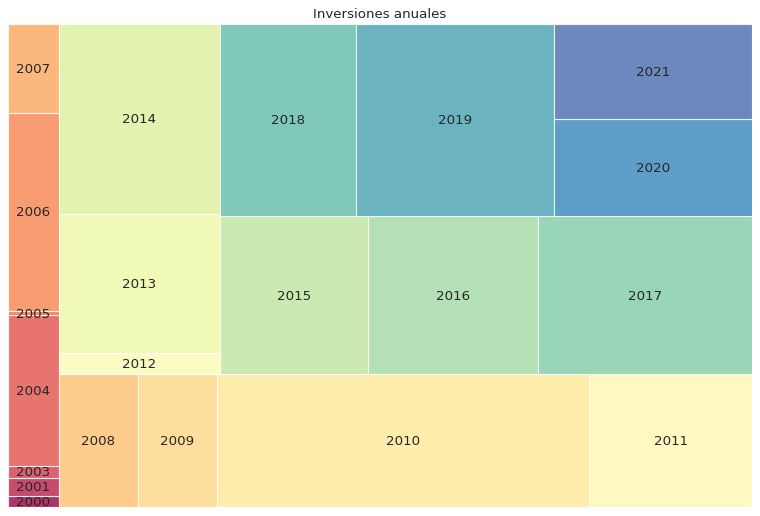

In [186]:
df1 = invest_by_years
sizes = df1['Investment (millions of dollars)'].values.tolist()
labels = df1["Year"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Inversiones anuales')
plt.axis('off')
plt.show()


# 2) ¿Cómo se ve el empleo anual generado por las inversiones de ofdi en ALyC?

In [187]:
by_years = ofdi.groupby("Year")
employment_by_years = pd.DataFrame(by_years.sum()["Employment (number of workers)"])


In [188]:
employment_by_years["Year"] = np.array(employment_by_years.index)

In [189]:
employment_by_years

,Employment (number of workers),Year
Year,,
2000,64,2000
2001,5500,2001
2003,1198,2003
2004,6342,2004
2005,891,2005
2006,7617,2006
2007,8761,2007
2008,13313,2008
2009,3531,2009


In [190]:
fig = px.line(employment_by_years, x="Year", y="Employment (number of workers)", title='Annual jobs generated by investments in OFDI')
fig.show()

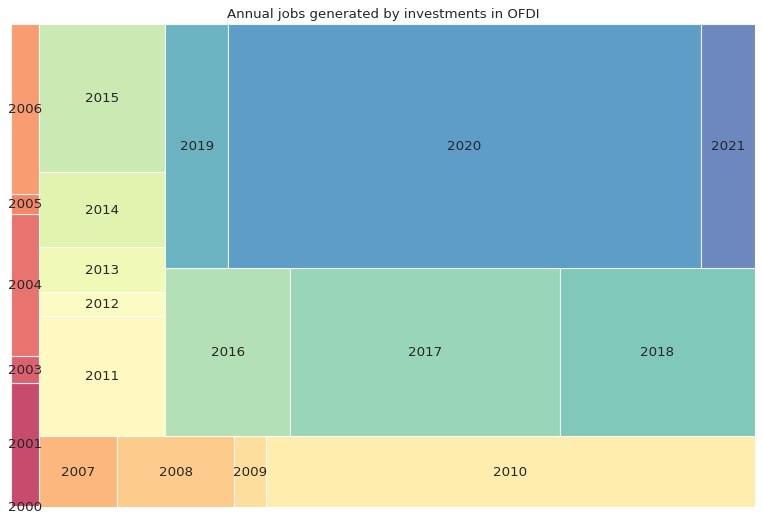

In [191]:
df2 = employment_by_years
sizes = df2['Employment (number of workers)'].values.tolist()
labels = df2["Year"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Annual jobs generated by investments in OFDI')
plt.axis('off')
plt.show()

Correlación entre el monto de inversión y el empleo a través de los años

In [192]:
fig = px.scatter_3d(ofdi, x="Investment (millions of dollars)", y="Employment (number of workers)", z='Year',
              color="Country in LAC")
fig.show()

# 3) ¿Cuáles son las diez empresas inversoras principales?


In [193]:
ofdi.columns

Index(['Year', 'Date', 'Investing Company',
       'Headquarter of Chinese Company: Province, Municipality, Autonomous Region in China',
       'Headquarter of Chinese Company: City', 'Target company',
       'Country in LAC', 'Destination sector', 'Project Type',
       'Destination city  in LAC', 'Employment (number of workers)',
       'Investment (millions of dollars)',
       'Raw materials = 0,, Manufacturing = 1, Services and domestic market = 2, Buying technology = 3',
       'Public property = 1, private = 0'],
      dtype='object')

# Empresas con mayor cantidad de inversiones en ALyC de 2000 a 2021

In [194]:
invest_co = ofdi.groupby("Investing Company").size().sort_values().reset_index(name = "amount")
invest_co = invest_co.sort_index(ascending=False)

In [195]:
invest_co.head(10)

,Investing Company,amount
318,Huawei Technologies,21
317,Trina Solar Energy,12
316,China Fishery Group Ltd,9
315,State Grid Corporation of China (SGCC),8
314,"Jiangxi Ganfeng Lithium Co.,Ltd",8
313,China Three Gorges Corporation (CTG),8
312,Zijin Mining Group Ltd,7
311,"BYD AUTO CO., LTD",7
310,Pacific Hydro,6
309,Fosun International Ltd,5


In [196]:
fig = px.bar(invest_co.head(10), x='Investing Company', y='amount', title='10 empresas chinas con mayor cantidad de inversiones en ALyC de 2000 a 2021')
fig.show()

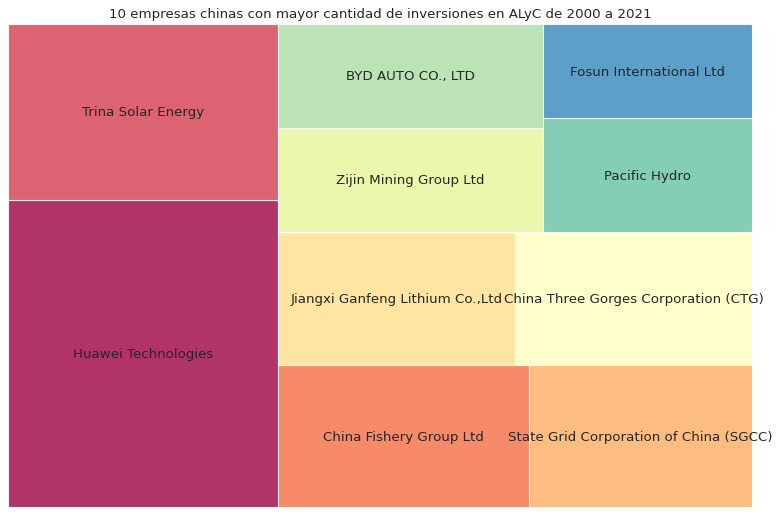

In [197]:
df3 = invest_co.head(10)
sizes = df3['amount'].values.tolist()
labels = df3["Investing Company"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('10 empresas chinas con mayor cantidad de inversiones en ALyC de 2000 a 2021')
plt.axis('off')
plt.show()


# Empresas con mayor cantidad de dinero invertido en ALyC, de 2000 a 2021 (mdd)

In [198]:
by_company = ofdi.groupby("Investing Company")
more_money_inv = pd.DataFrame(by_company.sum()["Investment (millions of dollars)"].sort_values(ascending=False))

In [199]:
more_money_inv["Company"] = np.array(more_money_inv.index)

In [200]:
more_money_inv.head(10)

,Investment (millions of dollars),Company
Investing Company,,
State Grid Corporation of China (SGCC),13312.0,State Grid Corporation of China (SGCC)
China Three Gorges Corporation (CTG),12660.0,China Three Gorges Corporation (CTG)
China Minmetals Group,11640.0,China Minmetals Group
China Petroleum & Chemical Corporation (Sinopec),10950.0,China Petroleum & Chemical Corporation (Sinopec)
Haier Group Corp.,5400.0,Haier Group Corp.
China Petroleum & Chemical Corporation (Sinopec),4870.0,China Petroleum & Chemical Corporation (Sinopec)
China National Petroleum Corporation (CNPC),4470.2,China National Petroleum Corporation (CNPC)
Tianqi Lithium Corp,4309.6,Tianqi Lithium Corp
State Power Investment Corporation Limited (SPIC),3903.5,State Power Investment Corporation Limited (SPIC)


In [201]:
fig = px.bar(more_money_inv.head(10), x='Company', y='Investment (millions of dollars)', title='Empresas con mayor cantidad de dinero invertido en ALyC, de 2000 a 2021 (mdd)')
fig.show()

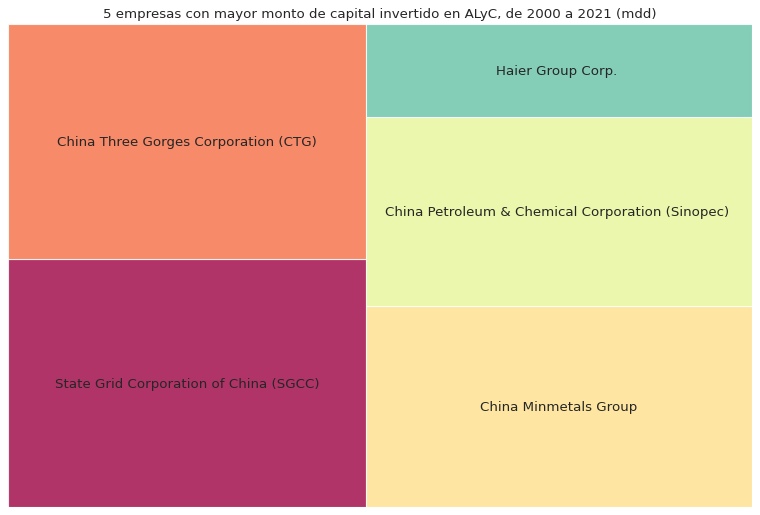

In [202]:
df4 = more_money_inv.head(5)
sizes = df4['Investment (millions of dollars)'].values.tolist()
labels = df4["Company"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('5 empresas con mayor monto de capital invertido en ALyC, de 2000 a 2021 (mdd)')
plt.axis('off')
plt.show()

# 4) ¿Qué sectores concentran las inversiones de ofdi en ALyC?

# Sectores económicos con mayor cantidad de inversiones

In [203]:
invest_sec = ofdi.groupby("Destination sector").size().sort_values().reset_index(name = "amount of investments")
invest_sec = invest_sec.sort_index(ascending=False)

In [204]:
invest_sec.head(10)

,Destination sector,amount of investments
30,Minerals,100
29,Energy,66
28,Communications,46
27,Electronics,43
26,Food and beverages,33
25,Automobile,31
24,Autoparts,28
23,Financial sector,28
22,"Industrial Machinery, Equipment & Tools",19
21,Agriculture and agroindustry,12


In [205]:
fig = px.bar(invest_sec.head(10), x='Destination sector', y='amount of investments', title='Sectores económicos con mayor cantidad de inversiones')
fig.show()

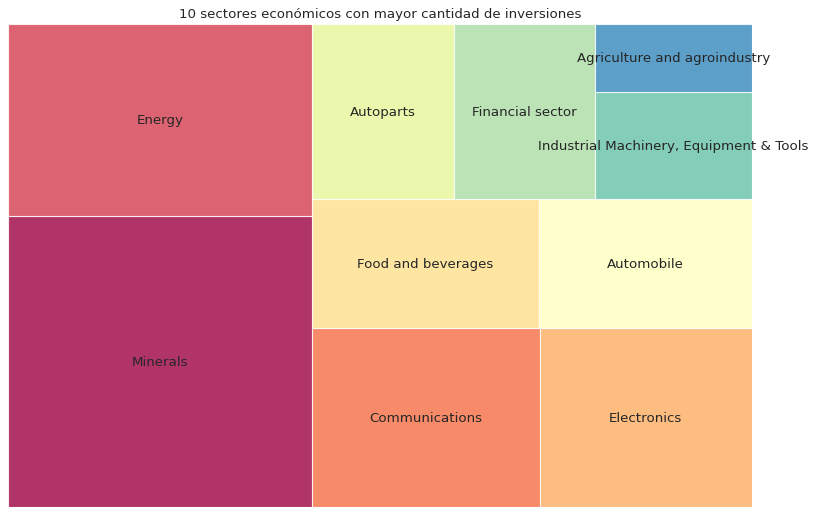

In [206]:
df5 = invest_sec.head(10)
sizes = df5['amount of investments'].values.tolist()
labels = df5["Destination sector"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('10 sectores económicos con mayor cantidad de inversiones')
plt.axis('off')
plt.show()

# Sectores económicos con mayor monto de capital invertido 

In [207]:
by_sec = ofdi.groupby("Destination sector")
more_money_sec = pd.DataFrame(by_sec.sum()["Investment (millions of dollars)"].sort_values(ascending=False))

In [208]:
more_money_sec.head()

,Investment (millions of dollars)
Destination sector,
Minerals,62960.8400
Energy,55663.2545
Electronics,9528.6200
Real estate,6490.3000
Financial sector,5308.1400


In [209]:
more_money_sec["Economic sector"] = np.array(more_money_sec.index)

In [210]:
more_money_sec.head()

,Investment (millions of dollars),Economic sector
Destination sector,,
Minerals,62960.8400,Minerals
Energy,55663.2545,Energy
Electronics,9528.6200,Electronics
Real estate,6490.3000,Real estate
Financial sector,5308.1400,Financial sector


In [211]:
fig = px.bar(more_money_sec.head(10), x='Economic sector', y='Investment (millions of dollars)', title='Sectores económicos con mayor monto de capital invertido')
fig.show()

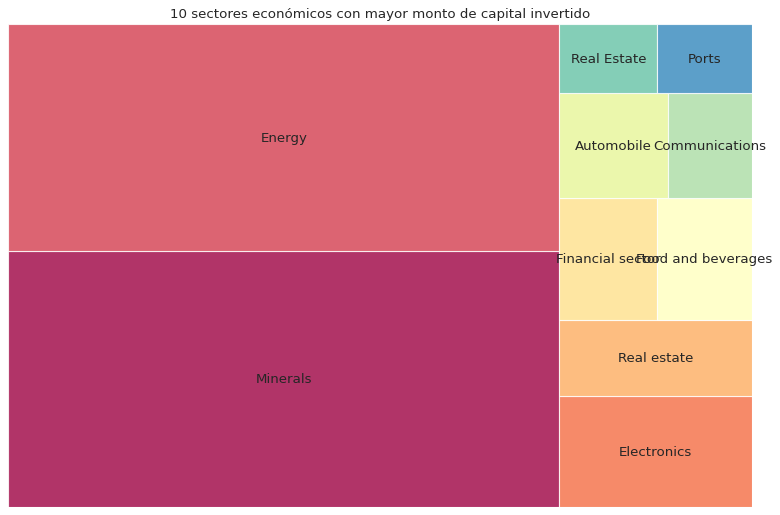

In [212]:
df6 = more_money_sec.head(10)
sizes = df6['Investment (millions of dollars)'].values.tolist()
labels = df6["Economic sector"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('10 sectores económicos con mayor monto de capital invertido')
plt.axis('off')
plt.show()

# 5) ¿Cómo se ven las inversiones anuales de ofdi en México?

In [213]:
set(ofdi["Country in LAC"])

{'Antigua y Barbuda',
 'Argentina',
 'Barbados',
 'Belice',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Ecuador',
 'El Salvador',
 'Guyana',
 'Haiti',
 'Honduras',
 'Jamaica',
 'Mexico',
 'Nicaragua',
 'Panama',
 'Peru',
 'Republica Dominicana',
 'República Dominicana',
 'Suriname',
 'Trinidad y Tobago',
 'Uruguay',
 'Venezuela'}

In [214]:
mx = ofdi[ofdi["Country in LAC"] == "Mexico"]

In [215]:
mx.columns

Index(['Year', 'Date', 'Investing Company',
       'Headquarter of Chinese Company: Province, Municipality, Autonomous Region in China',
       'Headquarter of Chinese Company: City', 'Target company',
       'Country in LAC', 'Destination sector', 'Project Type',
       'Destination city  in LAC', 'Employment (number of workers)',
       'Investment (millions of dollars)',
       'Raw materials = 0,, Manufacturing = 1, Services and domestic market = 2, Buying technology = 3',
       'Public property = 1, private = 0'],
      dtype='object')

In [216]:
mx_by_years = mx.groupby('Year')
investments_in_mx = pd.DataFrame(mx_by_years.sum()["Investment (millions of dollars)"])


In [217]:
investments_in_mx["Year"] = np.array(investments_in_mx.index)

In [218]:
fig = px.line(investments_in_mx, x="Year", y="Investment (millions of dollars)", title='Amount of annual investments in Mexico')
fig.show()

# Inversiones anuales en México con respecto de Brasil, Perú, Chile y Argentina

Brasil

In [219]:
br = ofdi[ofdi["Country in LAC"] == 'Brazil']
br_by_years = br.groupby('Year')
investments_in_br = pd.DataFrame(br_by_years.sum()["Investment (millions of dollars)"])
investments_in_br["Year"] = np.array(investments_in_br.index)

In [220]:
fig = px.line(investments_in_br, x="Year", y="Investment (millions of dollars)", title='Amount of annual investments in Brazil')
fig.show()

Perú

In [221]:
peru = ofdi[ofdi["Country in LAC"] == 'Peru']
peru_by_years = peru.groupby('Year')
investments_in_peru = pd.DataFrame(peru_by_years.sum()["Investment (millions of dollars)"])
investments_in_peru["Year"] = np.array(investments_in_peru.index)

In [222]:
fig = px.line(investments_in_peru, x="Year", y="Investment (millions of dollars)", title='Amount of annual investments in Peru')
fig.show()

Chile

In [223]:
chile = ofdi[ofdi["Country in LAC"] == 'Chile']
chile_by_years = chile.groupby('Year')
investments_in_chile = pd.DataFrame(chile_by_years.sum()["Investment (millions of dollars)"])
investments_in_chile["Year"] = np.array(investments_in_chile.index)

In [224]:
fig = px.line(investments_in_chile, x="Year", y="Investment (millions of dollars)", title='Amount of annual investments in Chile')
fig.show()

Argentina

In [225]:
arg = ofdi[ofdi["Country in LAC"] == 'Argentina']
arg_by_years = arg.groupby('Year')
investments_in_arg = pd.DataFrame(arg_by_years.sum()["Investment (millions of dollars)"])
investments_in_arg["Year"] = np.array(investments_in_arg.index)

In [226]:
fig = px.line(investments_in_arg, x="Year", y="Investment (millions of dollars)", title='Amount of annual investments in Argentina')
fig.show()

# 6) ¿Cómo se ven los empleos anuales generados por las inversiones de ofdi en México?

In [227]:
# mx_by_years = mx.groupby('Year')
employments_in_mx = pd.DataFrame(mx_by_years.sum()["Employment (number of workers)"])
employments_in_mx["Year"] = np.array(employments_in_mx.index)


In [228]:
fig = px.line(employments_in_mx, x="Year", y="Employment (number of workers)", title='Jobs generated in Mexico due to Chinese investments in OFDI')
fig.show()

# 7) En México, ¿qué sectores económicos son los más relevantes para China?

In [229]:
mx.columns

Index(['Year', 'Date', 'Investing Company',
       'Headquarter of Chinese Company: Province, Municipality, Autonomous Region in China',
       'Headquarter of Chinese Company: City', 'Target company',
       'Country in LAC', 'Destination sector', 'Project Type',
       'Destination city  in LAC', 'Employment (number of workers)',
       'Investment (millions of dollars)',
       'Raw materials = 0,, Manufacturing = 1, Services and domestic market = 2, Buying technology = 3',
       'Public property = 1, private = 0'],
      dtype='object')

In [230]:
mx_by_sec = mx.groupby('Destination sector')
mx_sec = pd.DataFrame(mx_by_sec.sum()["Investment (millions of dollars)"].sort_values(ascending=False))
mx_sec["Destination sector"] = np.array(mx_sec.index)

In [231]:
mx_sec.head()

,Investment (millions of dollars),Destination sector
Destination sector,,
Electronics,6459.05,Electronics
Autoparts,2465.51,Autoparts
Energy,2216.25,Energy
Automobile,2025.90,Automobile
Minerals,913.00,Minerals


In [232]:
fig = px.bar(mx_sec.head(10), x='Destination sector', y='Investment (millions of dollars)', title='Sectores en México más relevantes para las inversiones chinas')
fig.show()

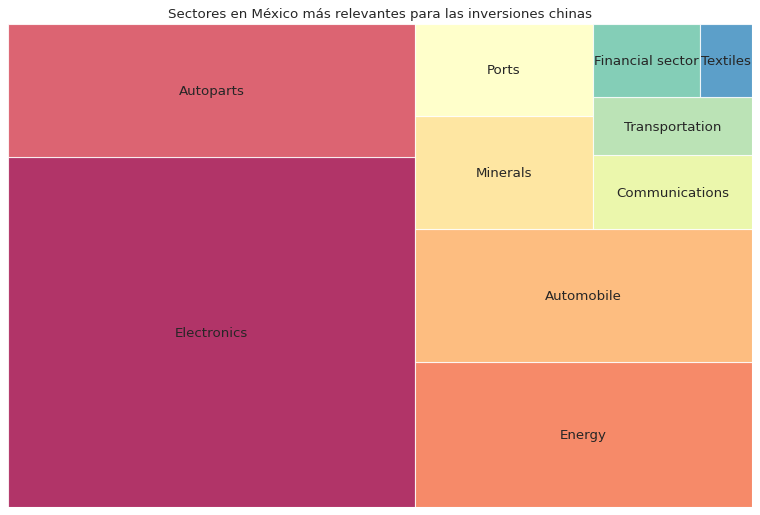

In [233]:
df7 = mx_sec.head(10)
sizes = df7['Investment (millions of dollars)'].values.tolist()
labels = df7['Destination sector']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Sectores en México más relevantes para las inversiones chinas')
plt.axis('off')
plt.show()

# 8) Empresas con mayor cantidad de empleos generados por inversiones en OFDI 

In [234]:
ofdi.columns

Index(['Year', 'Date', 'Investing Company',
       'Headquarter of Chinese Company: Province, Municipality, Autonomous Region in China',
       'Headquarter of Chinese Company: City', 'Target company',
       'Country in LAC', 'Destination sector', 'Project Type',
       'Destination city  in LAC', 'Employment (number of workers)',
       'Investment (millions of dollars)',
       'Raw materials = 0,, Manufacturing = 1, Services and domestic market = 2, Buying technology = 3',
       'Public property = 1, private = 0'],
      dtype='object')

In [235]:
invest_co_employments = ofdi.groupby("Investing Company")
co_employments = pd.DataFrame(invest_co_employments.sum()["Employment (number of workers)"].sort_values(ascending=False))
co_employments["Company"] = np.array(co_employments.index)

In [236]:
co_employments.head(10)

,Employment (number of workers),Company
Investing Company,,
Didi Chuxing Technology (Didi),162600,Didi Chuxing Technology (Didi)
China National Petroleum Corporation (CNPC) and Sinopec,22000,China National Petroleum Corporation (CNPC) an...
China Gezhouba Group Company (CGGC),17393,China Gezhouba Group Company (CGGC)
China Merchants Port Holding (CMPorts),16000,China Merchants Port Holding (CMPorts)
China Three Gorges Corporation (CTG),13505,China Three Gorges Corporation (CTG)
China Communications Construction Company (CCCC),12950,China Communications Construction Company (CCCC)
Hutchison Port Holding (HPH),10644,Hutchison Port Holding (HPH)
HNA Group Co.,10467,HNA Group Co.
Tianqi Lithium Corp,9152,Tianqi Lithium Corp


In [237]:
fig = px.bar(co_employments.head(10), x='Company', y="Employment (number of workers)", title='Empresas con mayor cantidad de empleos generados en ALyC por inversiones en OFDI')
fig.show()

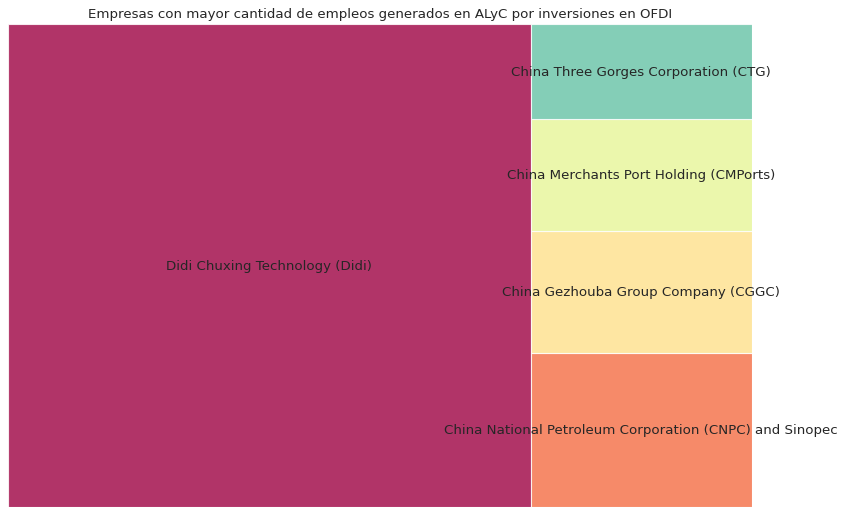

In [238]:
df8 = co_employments.head(5)
sizes = df8["Employment (number of workers)"].values.tolist()
labels = df8['Company']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Empresas con mayor cantidad de empleos generados en ALyC por inversiones en OFDI')
plt.axis('off')
plt.show()

# **Infraestructura**

# Preguntas

* 0) Países con mayor inversión en infraestructura de 2000 a 2021
* 1) ¿Cómo se ve el monto anual de inversiones en infraestructura en ALyC?
* 2) ¿Cómo se ve el empleo anual generado por las inversiones en infraestructura en ALyC?
* 3) ¿Cuáles son las diez empresas inversoras principales?
* 4) ¿Qué sectores concentran las inversiones de infraestructura en ALyC?
* 5) ¿Cómo se ven las inversiones anuales de infraestructura en México?
* 6) ¿Cómo se ven los empleos anuales generados por las inversiones de infraestructura en México?
* 7) En México, ¿qué sectores económicos son los más relevantes para China?
* 8) Empresas con mayor cantidad de empleos generados por inversiones en infraestructura

In [239]:
inf = pd.read_excel("/content/drive/MyDrive/DEV F/Proyecto/CECHIMEX/DusselPeters_Monitor_Infraestructura_Database_2022.xlsx", skiprows = [0])

In [240]:
inf = inf.rename(columns = {"(Amount ($ million of dollars)" : "Amount ($ million of dollars)"})

In [241]:
inf.columns

Index(['Type of project (sector)', 'Name of the Project', 'Year', 'Country',
       'Chinese firm', 'Related firms',
       'Headquarters of the Chinese firm in China', 'Headquarters: city',
       'Property of the firm: private (0), central government (1), city (2), province (3), county (4)',
       'Amount ($ million of dollars)', 'Total employment'],
      dtype='object')

In [242]:
inf.head()

,Type of project (sector),Name of the Project,Year,Country,Chinese firm,Related firms,Headquarters of the Chinese firm in China,Headquarters: city,"Property of the firm: private (0), central government (1), city (2), province (3), county (4)",Amount ($ million of dollars),Total employment
0,Energía,"Central Termoeléctrica ""Candiota III"" en Río G...",2005,Brazil,CITIC Group,CITIC International Contracting,Beijing,Beijing,1,430.0,4750
1,Energía,Represa Chalillo,2005,Belice,Sinohydro,"Sinohydro, Belize Electricity Limited",Beijing,Beijing,1,30.0,350
2,Energía,Gasoduto Cabiúnas-Vitória en Río de Janeiro y ...,2006,Brazil,China Petroleum & Chemical Corporation (SINOPEC),China Petroleum & Chemical Corporation (SINOPEC),Beijing,Beijing,1,239.0,2600
3,Energía,Section 3 of Venezuela Water Supply Project (p...,2007,Venezuela,China National Machinery Industry Corporation ...,China CAMC Engineering Co,Beijing,Beijing,1,108.0,9600
4,Energía,Represa Vaca,2007,Belice,Sinohydro,"Sinohydro, Belize Electricity Limited",Beijing,Beijing,1,39.0,150


# 0) Países con mayor inversión en infraestructura de 2000 a 2021

Número de empresas inversoras

In [243]:
grouped_countries_inf = inf.groupby("Country")

In [244]:
higher_investments_inf = pd.DataFrame(grouped_countries_inf.sum()["Amount ($ million of dollars)"].sort_values(ascending=False))

In [245]:
higher_investments_inf["Country"] = np.array(higher_investments_inf.index)

In [246]:
higher_investments_inf.head(10)

,Amount ($ million of dollars),Country
Country,,
Argentina,26179.445000,Argentina
Brazil,15932.570000,Brazil
Ecuador,8554.462800,Ecuador
Venezuela,8062.710000,Venezuela
Colombia,7377.080000,Colombia
Bolivia,5757.700000,Bolivia
Chile,5470.400000,Chile
Cuba,5270.000000,Cuba
Mexico,5163.072932,Mexico


In [247]:
fig = px.bar(higher_investments_inf, x='Country', y='Amount ($ million of dollars)', title='Países con mayor inversión en infraestructura de 2000 a 2021')
fig.show()

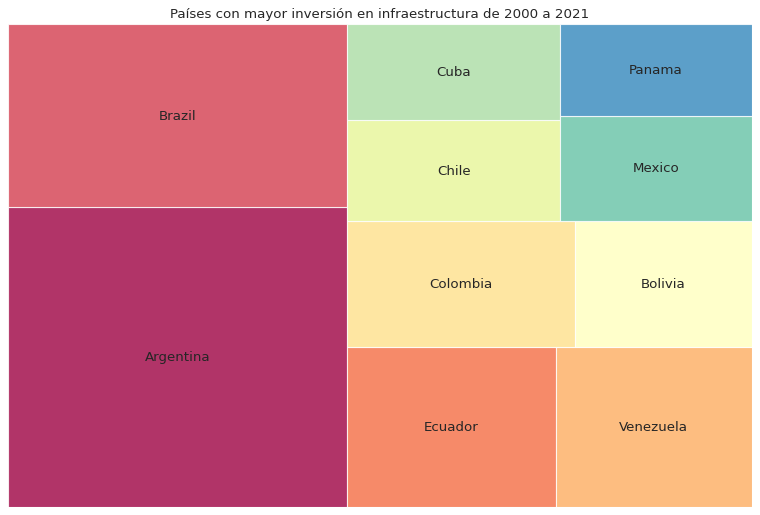

In [248]:
ds = higher_investments_inf.head(10)
sizes = ds['Amount ($ million of dollars)'].values.tolist()
labels = ds['Country']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Países con mayor inversión en infraestructura de 2000 a 2021')
plt.axis('off')
plt.show()

# 1) ¿Cómo se ve el monto anual de inversiones de infraestructura en ALyC?

In [249]:
by_years_inf = inf.groupby("Year")
invest_by_years_inf = pd.DataFrame(by_years_inf.sum()["Amount ($ million of dollars)"])
invest_by_years_inf["Year"] = np.array(invest_by_years_inf.index)

In [250]:
invest_by_years_inf

,Amount ($ million of dollars),Year
Year,,
2005,460.000000,2005
2006,239.000000,2006
2007,147.000000,2007
2009,687.100000,2009
2010,13525.503000,2010
2011,477.350000,2011
2012,4804.000000,2012
2013,3344.200000,2013
2014,3108.100000,2014


In [251]:
fig = px.line(invest_by_years_inf, x="Year", y="Amount ($ million of dollars)", title='Annual investments in infraestructure in ALyC')
fig.show()

# 2) ¿Cómo se ve el empleo anual generado por las inversiones de infraestructura en ALyC?

In [252]:
employment_by_years_inf = pd.DataFrame(by_years_inf.sum()["Total employment"])
employment_by_years_inf["Year"] = np.array(employment_by_years_inf.index)

In [253]:
fig = px.line(employment_by_years_inf, x="Year", y="Total employment", title='Annual jobs generated by Chinese investments in infrastructure')
fig.show()

Correlación entre el monto de inversión y el empleo a través de los años

In [254]:
inf.columns

Index(['Type of project (sector)', 'Name of the Project', 'Year', 'Country',
       'Chinese firm', 'Related firms',
       'Headquarters of the Chinese firm in China', 'Headquarters: city',
       'Property of the firm: private (0), central government (1), city (2), province (3), county (4)',
       'Amount ($ million of dollars)', 'Total employment'],
      dtype='object')

In [255]:
fig = px.scatter_3d(inf, x='Amount ($ million of dollars)', y='Total employment', z='Year',
              color="Country")
fig.show()

# 3) ¿Cuáles son las diez empresas inversoras principales?

# Empresas con mayor cantidad de inversiones en ALyC de 2000 a 2021

In [256]:
invest_co_inf = inf.groupby('Chinese firm').size().sort_values().reset_index(name = "amount")
invest_co_inf = invest_co_inf.sort_index(ascending=False)

In [257]:
invest_co_inf.head(10)

,Chinese firm,amount
62,Power Construction Corporation of China (Power...,25
61,China Communications Construction Company (CCCC),22
60,China National Machinery Industry Corporation ...,11
59,China Railway Construction Corporation (CRCC),9
58,Canadian Solar,9
57,BYD Company Limited (BYD),8
56,CRRC Group Corporation (CRRC),8
55,China Three Gorges Corporation (CTG),6
54,Yangtze Optcal Fibre and Cable (YOFC),4
53,China Railway Engineering Corporation (CRECG),4


In [258]:
fig = px.bar(invest_co_inf.head(10), x='Chinese firm', y='amount', title='Empresas chinas con mayor cantidad de inversiones en ALyC de 2000 a 2021')
fig.show()

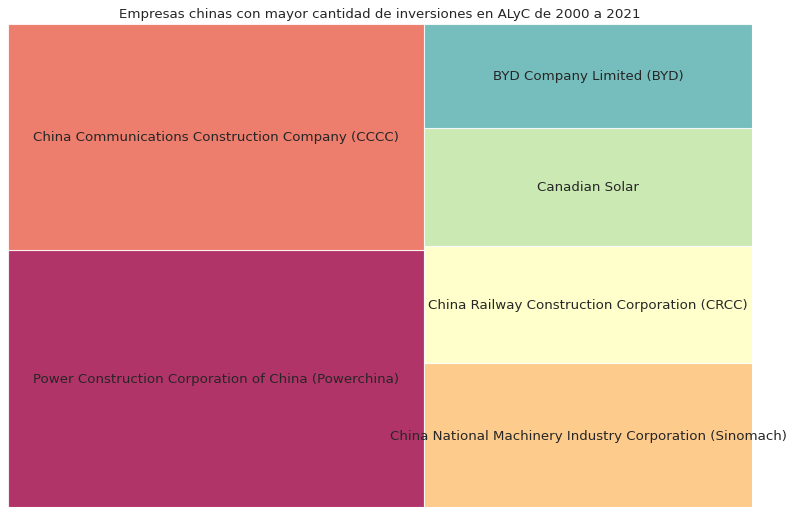

In [259]:
ds1 = invest_co_inf.head(6)
sizes = ds1['amount'].values.tolist()
labels = ds1['Chinese firm']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Empresas chinas con mayor cantidad de inversiones en ALyC de 2000 a 2021')
plt.axis('off')
plt.show()

# Empresas con mayor cantidad de dinero invertido en ALyC, de 2000 a 2021 (mdd)

In [260]:
by_company_inf = inf.groupby("Chinese firm")
more_money_inv_inf = pd.DataFrame(by_company_inf.sum()["Amount ($ million of dollars)"].sort_values(ascending=False))
more_money_inv_inf["Chinese firm"] = np.array(more_money_inv_inf.index)
more_money_inv_inf.head(10)

,Amount ($ million of dollars),Chinese firm
Chinese firm,,
China Communications Construction Company (CCCC),13278.3198,China Communications Construction Company (CCCC)
Power Construction Corporation of China (Powerchina),13171.8530,Power Construction Corporation of China (Power...
China National Nuclear Corporation (CNNC),7900.0000,China National Nuclear Corporation (CNNC)
China Railway Construction Corporation (CRCC),7754.7000,China Railway Construction Corporation (CRCC)
China National Petroleum Corporation (CNPC),7307.0000,China National Petroleum Corporation (CNPC)
China National Machinery Industry Corporation (Sinomach),6318.0000,China National Machinery Industry Corporation ...
China Energy Engineering Group (CEEC),5469.0000,China Energy Engineering Group (CEEC)
State Grid Corporation of China (SGCC),5081.0000,State Grid Corporation of China (SGCC)
Huawei Technologies,3048.0000,Huawei Technologies


In [261]:
fig = px.bar(more_money_inv_inf.head(10), x="Chinese firm", y="Amount ($ million of dollars)", title='Empresas con mayor cantidad de dinero invertido en ALyC, de 2000 a 2021 (mdd)')
fig.show()

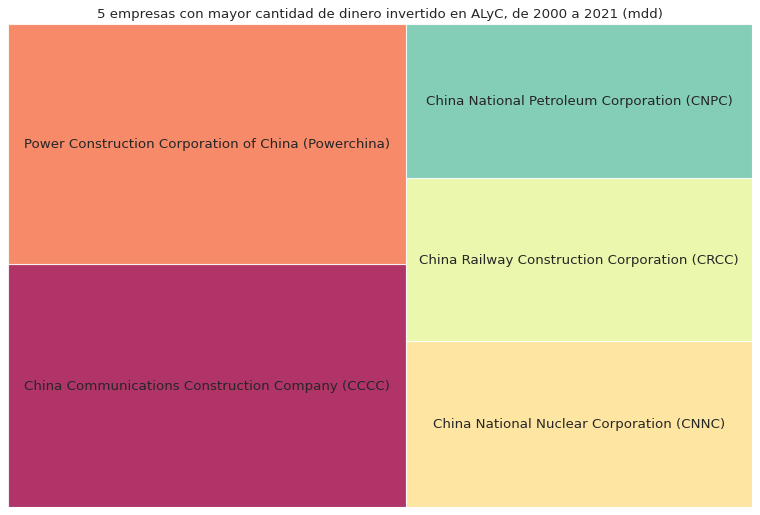

In [262]:
ds2 = more_money_inv_inf.head(5)
sizes = ds2['Amount ($ million of dollars)'].values.tolist()
labels = ds2['Chinese firm']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('5 empresas con mayor cantidad de dinero invertido en ALyC, de 2000 a 2021 (mdd)')
plt.axis('off')
plt.show()

# 4) ¿Qué sectores concentran las inversiones de infraestructura en ALyC?

In [263]:
inf.columns

Index(['Type of project (sector)', 'Name of the Project', 'Year', 'Country',
       'Chinese firm', 'Related firms',
       'Headquarters of the Chinese firm in China', 'Headquarters: city',
       'Property of the firm: private (0), central government (1), city (2), province (3), county (4)',
       'Amount ($ million of dollars)', 'Total employment'],
      dtype='object')

In [264]:
invest_sec_inf = inf.groupby("Type of project (sector)").size().sort_values().reset_index(name = "amount of investments")
invest_sec_inf = invest_sec_inf.sort_index(ascending=False)
invest_sec_inf.head(10)

,Type of project (sector),amount of investments
9,Energía,72
8,Transporte,65
7,Otros,14
6,Telecomunicaciones,12
5,Puerto,11
4,Seguridad,6
3,Salud,4
2,Minería,2
1,Aeropuerto,2
0,Acueductos,2


In [265]:
fig = px.bar(invest_sec_inf.head(10), x='Type of project (sector)', y='amount of investments', title='Sectores económicos con mayor cantidad de inversiones')
fig.show()

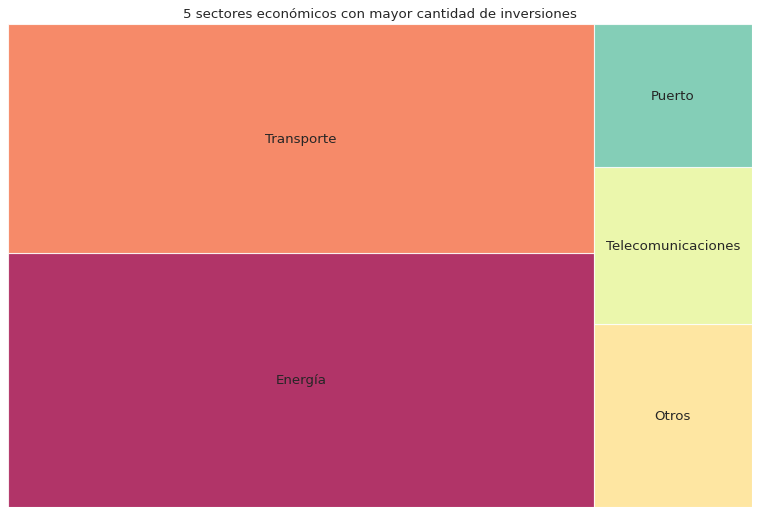

In [266]:
ds3 = invest_sec_inf.head(5)
sizes = ds3['amount of investments'].values.tolist()
labels = ds3['Type of project (sector)']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('5 sectores económicos con mayor cantidad de inversiones')
plt.axis('off')
plt.show()

# Sectores económicos con mayor monto de capital invertido

In [267]:
by_sec_inf = inf.groupby('Type of project (sector)')
more_money_sec_inf = pd.DataFrame(by_sec_inf.sum()['Amount ($ million of dollars)'].sort_values(ascending=False))
more_money_sec_inf['Sector'] = np.array(more_money_sec_inf.index)
more_money_sec_inf.head(10)


,Amount ($ million of dollars),Sector
Type of project (sector),,
Energía,50344.603000,Energía
Transporte,33686.311800,Transporte
Telecomunicaciones,4171.330000,Telecomunicaciones
Puerto,3868.714932,Puerto
Minería,1588.000000,Minería
Otros,1523.500000,Otros
Seguridad,1259.200000,Seguridad
Salud,1248.000000,Salud
Acueductos,458.000000,Acueductos


In [268]:
fig = px.bar(more_money_sec_inf.head(10), x='Sector', y='Amount ($ million of dollars)', title='Sectores económicos con mayor monto de capital invertido')
fig.show()

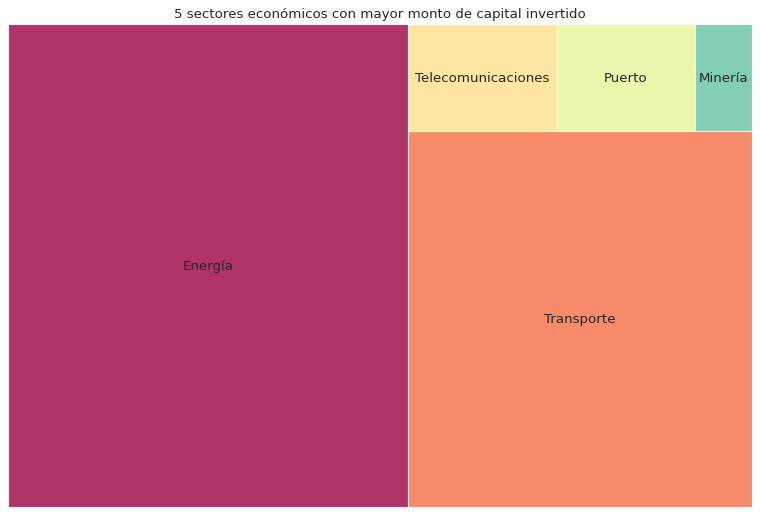

In [269]:
ds4 = more_money_sec_inf.head(5)
sizes = ds4['Amount ($ million of dollars)'].values.tolist()
labels = ds4["Sector"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('5 sectores económicos con mayor monto de capital invertido')
plt.axis('off')
plt.show()

# 5) ¿Cómo se ven las inversiones anuales de infraestructura en México?

In [270]:
mx_inf = inf[inf["Country"] == "Mexico"]

In [271]:
mx_inf.columns

Index(['Type of project (sector)', 'Name of the Project', 'Year', 'Country',
       'Chinese firm', 'Related firms',
       'Headquarters of the Chinese firm in China', 'Headquarters: city',
       'Property of the firm: private (0), central government (1), city (2), province (3), county (4)',
       'Amount ($ million of dollars)', 'Total employment'],
      dtype='object')

In [272]:
set(mx_inf["Year"])

{2017, 2018, 2019, 2020, 2021}

In [273]:
mx_by_years_inf = mx_inf.groupby('Year')
investments_in_mx_inf = pd.DataFrame(mx_by_years_inf.sum()['Amount ($ million of dollars)'])
investments_in_mx_inf["Year"] = np.array(investments_in_mx_inf.index)

In [274]:
fig = px.line(investments_in_mx_inf, x="Year", y="Amount ($ million of dollars)", title='Amount of annual investments in Mexico')
fig.show()

# 6) ¿Cómo se ven los empleos anuales generados por las inversiones de infraestructura en México?

In [275]:
# mx_by_years_inf = mx.groupby('Year')
employments_in_mx_inf = pd.DataFrame(mx_by_years_inf.sum()['Total employment'])
employments_in_mx_inf["Year"] = np.array(employments_in_mx_inf.index)


In [276]:
fig = px.line(employments_in_mx_inf, x="Year", y="Total employment", title='Jobs generated in Mexico due to Chinese investments in infraestructure')
fig.show()

# 7) En México, ¿qué sectores económicos son los más relevantes para China?

In [277]:
mx_inf.columns

Index(['Type of project (sector)', 'Name of the Project', 'Year', 'Country',
       'Chinese firm', 'Related firms',
       'Headquarters of the Chinese firm in China', 'Headquarters: city',
       'Property of the firm: private (0), central government (1), city (2), province (3), county (4)',
       'Amount ($ million of dollars)', 'Total employment'],
      dtype='object')

In [278]:
mx_by_sec_inf =  mx_inf.groupby('Type of project (sector)')
mx_sec_inf = pd.DataFrame(mx_by_sec_inf.sum()["Amount ($ million of dollars)"].sort_values(ascending=False))
mx_sec_inf['Type of project (sector)'] = np.array(mx_sec_inf.index)

In [279]:
mx_sec_inf

,Amount ($ million of dollars),Type of project (sector)
Type of project (sector),,
Transporte,2891.458000,Transporte
Puerto,1402.714932,Puerto
Energía,854.900000,Energía
Telecomunicaciones,14.000000,Telecomunicaciones


In [280]:
fig = px.bar(mx_sec_inf.head(10), x='Type of project (sector)', y="Amount ($ million of dollars)", title='Sectores más relevantes en México para las inversiones chinas en infraestructura')
fig.show()

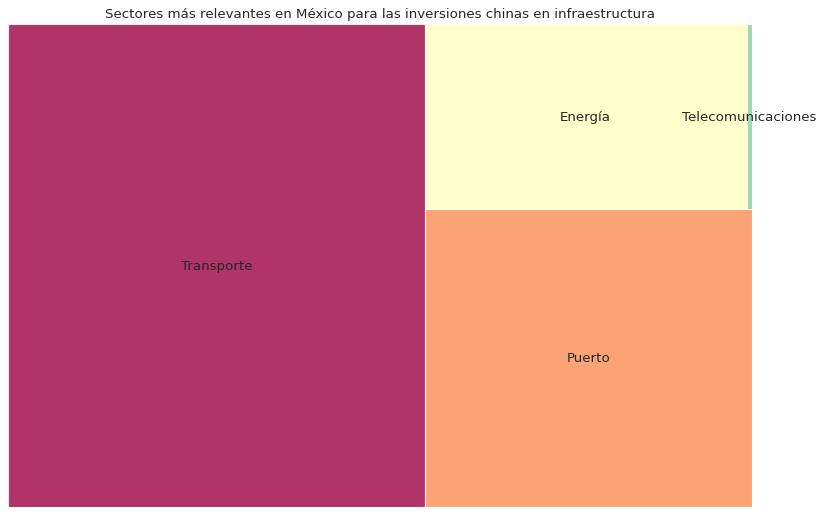

In [281]:
ds5 = mx_sec_inf
sizes = ds5["Amount ($ million of dollars)"].values.tolist()
labels = ds5["Type of project (sector)"]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Sectores más relevantes en México para las inversiones chinas en infraestructura')
plt.axis('off')
plt.show()

# 8) Empresas con mayor cantidad de empleos generados por inversiones en OFDI

In [282]:
inf.head()

,Type of project (sector),Name of the Project,Year,Country,Chinese firm,Related firms,Headquarters of the Chinese firm in China,Headquarters: city,"Property of the firm: private (0), central government (1), city (2), province (3), county (4)",Amount ($ million of dollars),Total employment
0,Energía,"Central Termoeléctrica ""Candiota III"" en Río G...",2005,Brazil,CITIC Group,CITIC International Contracting,Beijing,Beijing,1,430.0,4750
1,Energía,Represa Chalillo,2005,Belice,Sinohydro,"Sinohydro, Belize Electricity Limited",Beijing,Beijing,1,30.0,350
2,Energía,Gasoduto Cabiúnas-Vitória en Río de Janeiro y ...,2006,Brazil,China Petroleum & Chemical Corporation (SINOPEC),China Petroleum & Chemical Corporation (SINOPEC),Beijing,Beijing,1,239.0,2600
3,Energía,Section 3 of Venezuela Water Supply Project (p...,2007,Venezuela,China National Machinery Industry Corporation ...,China CAMC Engineering Co,Beijing,Beijing,1,108.0,9600
4,Energía,Represa Vaca,2007,Belice,Sinohydro,"Sinohydro, Belize Electricity Limited",Beijing,Beijing,1,39.0,150


In [283]:
invest_co_employments_inf = inf.groupby('Chinese firm')
co_employments_inf = pd.DataFrame(invest_co_employments_inf.sum()['Total employment'].sort_values(ascending=False))
co_employments_inf["Company"] = np.array(co_employments_inf.index)

In [284]:
co_employments_inf.head()

,Total employment,Company
Chinese firm,,
CK Hutchison Holdings,140000,CK Hutchison Holdings
China Communications Construction Company (CCCC),79111,China Communications Construction Company (CCCC)
China Railway Engineering Corporation (CRECG),58079,China Railway Engineering Corporation (CRECG)
China Railway Construction Corporation (CRCC),48198,China Railway Construction Corporation (CRCC)
State Grid Corporation of China (SGCC),43876,State Grid Corporation of China (SGCC)


In [285]:
fig = px.bar(co_employments_inf.head(10), x='Total employment', y="Company", title='Empresas con mayor cantidad de empleos generados por inversiones en infraestructura')
fig.show()

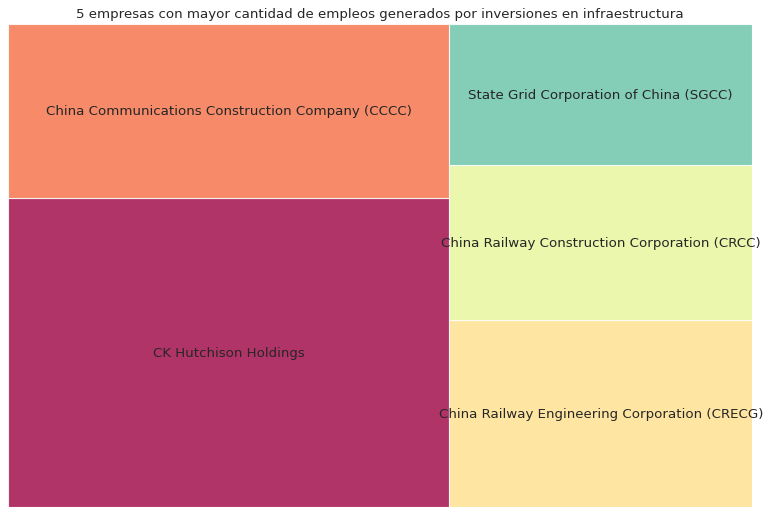

In [286]:
ds6 = co_employments_inf.head(5)
sizes = ds6["Total employment"].values.tolist()
labels = ds6['Company']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('5 empresas con mayor cantidad de empleos generados por inversiones en infraestructura')
plt.axis('off')
plt.show()